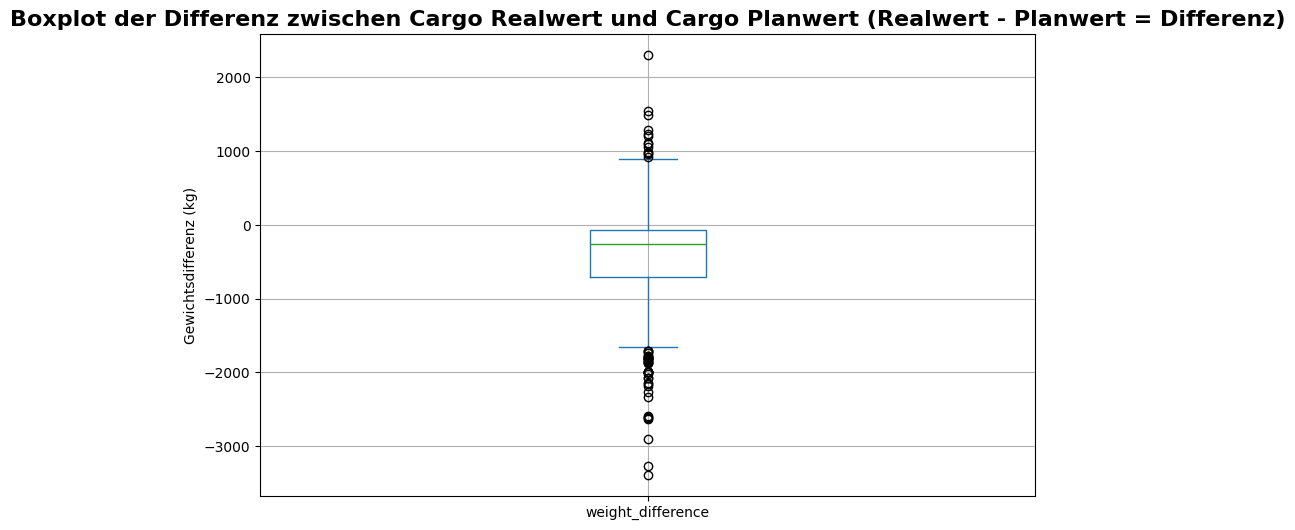

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
file_path = '/data_engineering/UpdateEstimatesAction/cargo_estimates_and_loadtable_MNOP_ABCD.csv'
data = pd.read_csv(file_path)

# Sicherstellen, dass die relevanten Spalten vorhanden sind
if 'cargo_total' in data.columns and 'cargo_estimate' in data.columns:
    # Differenz berechnen
    data['weight_difference'] = data['cargo_total'] - data['cargo_estimate']
    
    # Datenpunkte innerhalb des Bereichs von -4000 bis 4000 behalten
    filtered_data = data[(data['weight_difference'] >= -4000) & (data['weight_difference'] <= 4000)]
    
    # Boxplot für gefilterte Daten erstellen
    plt.figure(figsize=(10, 6))
    filtered_data['weight_difference'].plot(kind='box')
    plt.title('Boxplot der Differenz zwischen Cargo Realwert und Cargo Planwert (Realwert - Planwert = Differenz)', fontsize = 16, fontweight = "bold") 
    plt.ylabel('Gewichtsdifferenz (kg)')
    plt.grid(True)
    plt.show()
else:
    print("Die erforderlichen Spalten 'cargo_total' oder 'cargo_estimate_weight' fehlen im Datensatz.")


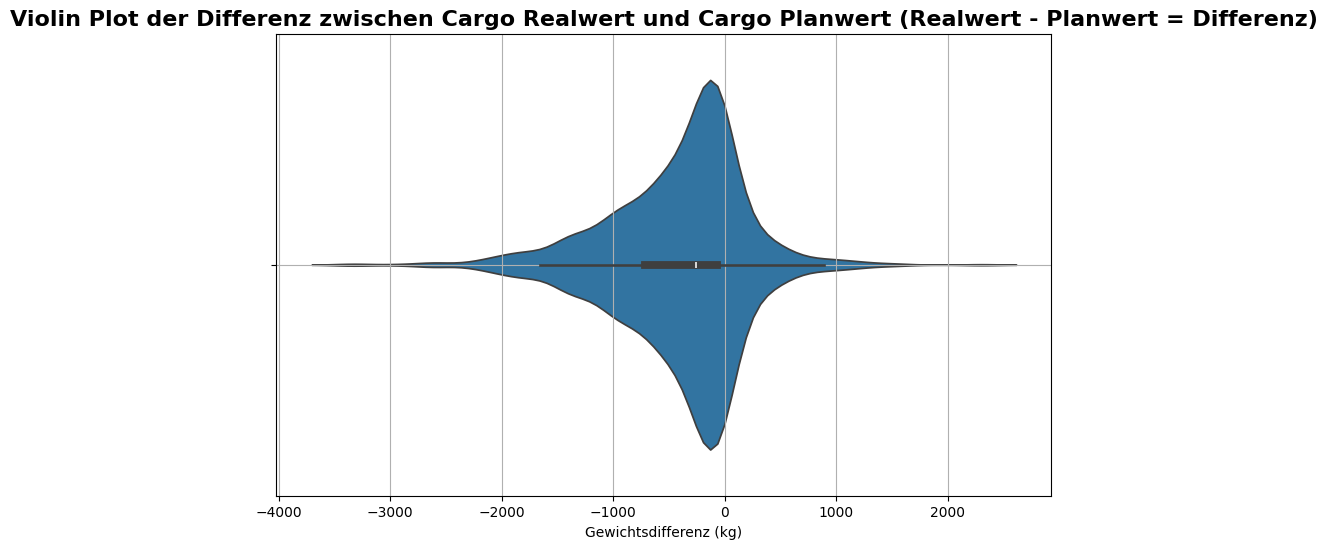

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
file_path = '/Users/nikyakovlev/Documents/GitHub/aircraft_load/data_engineering/niks_data_mata/UpdateEstimatesAction/cargo_estimates_and_loadtable_MNOP_ABCD.csv'
data = pd.read_csv(file_path)

# Sicherstellen, dass die relevanten Spalten vorhanden sind
if 'cargo_total' in data.columns and 'cargo_estimate' in data.columns:
    # Differenz berechnen
    data['weight_difference'] = data['cargo_total'] - data['cargo_estimate']
    
    # Datenpunkte innerhalb des Bereichs von -4000 bis 4000 behalten
    filtered_data = data[(data['weight_difference'] >= -4000) & (data['weight_difference'] <= 4000)]
    
    # Violin Plot (Butterfly Plot) erstellen
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=filtered_data, x='weight_difference')
    plt.title('Violin Plot der Differenz zwischen Cargo Realwert und Cargo Planwert (Realwert - Planwert = Differenz)', fontsize = 16, fontweight = "bold")
    plt.xlabel('Gewichtsdifferenz (kg)')
    plt.grid(True)
    plt.show()
else:
    print("Die erforderlichen Spalten 'cargo_total' oder 'cargo_estimate_weight' fehlen im Datensatz.")


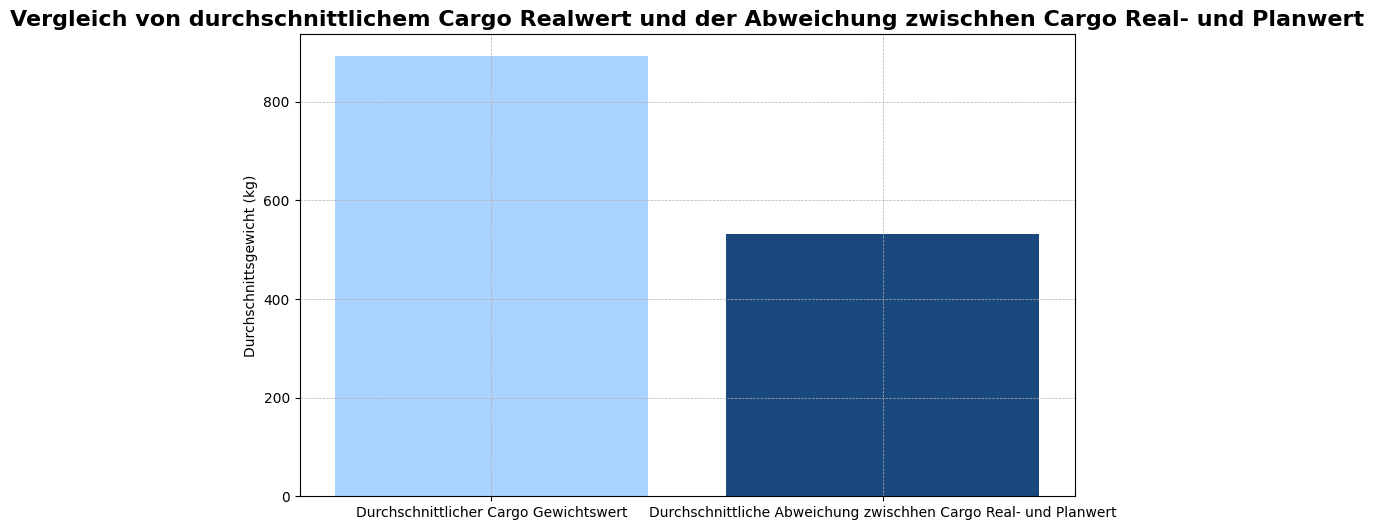

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
file_path = '/Users/nikyakovlev/Documents/GitHub/aircraft_load/data_engineering/niks_data_mata/UpdateEstimatesAction/cargo_estimates_and_loadtable_MNOP_ABCD.csv'
data = pd.read_csv(file_path)

# Sicherstellen, dass die relevanten Spalten vorhanden sind
if 'cargo_total' in data.columns and 'cargo_estimate' in data.columns:
    # Differenz berechnen und in positive Zahlen umwandeln
    data['adjusted_difference'] = np.sqrt((data['cargo_total'] - data['cargo_estimate'])**2)
    
    # Durchschnittswerte berechnen
    avg_cargo_total = data['cargo_total'].mean()
    avg_adjusted_difference = data['adjusted_difference'].mean()
    
    # Daten für den Barchart vorbereiten
    values = [avg_cargo_total, avg_adjusted_difference]
    labels = ['Durchschnittlicher Cargo Gewichtswert', 'Durchschnittliche Abweichung zwischhen Cargo Real- und Planwert']
    
    # Barchart erstellen
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=['#AAD4FF', '#1a497e'])
    plt.title('Vergleich von durchschnittlichem Cargo Realwert und der Abweichung zwischhen Cargo Real- und Planwert', fontsize = 16, fontweight = "bold")
    plt.ylabel('Durchschnittsgewicht (kg)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("Die erforderlichen Spalten 'cargo_total' oder 'cargo_estimate_weight' fehlen im Datensatz.")


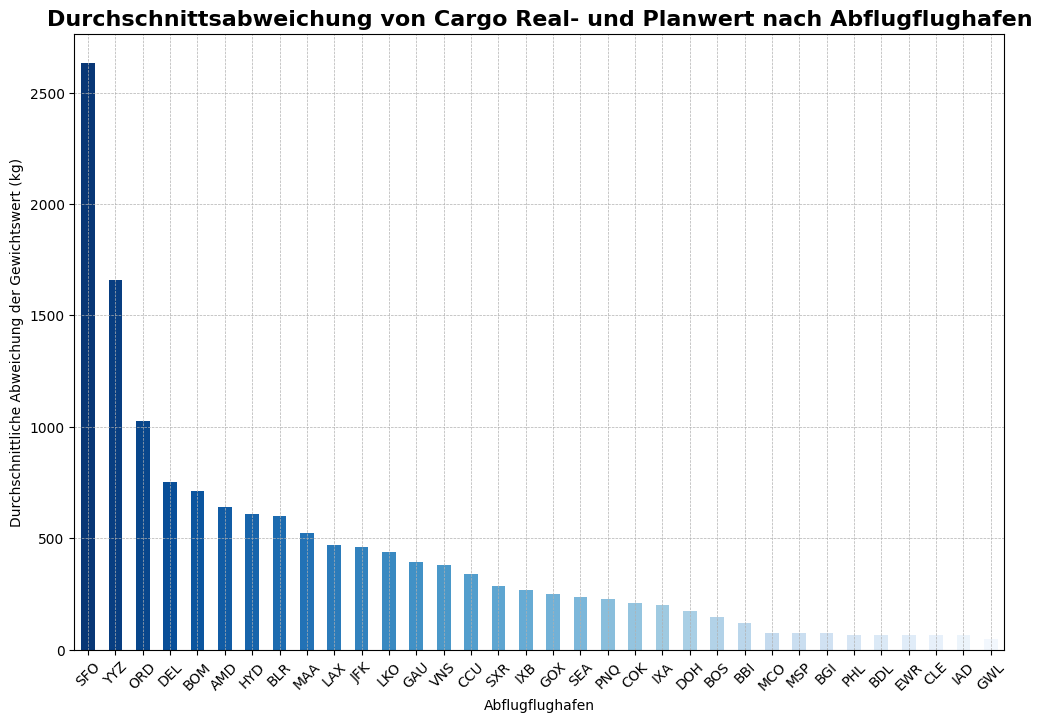

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Daten laden
file_path = '/Users/nikyakovlev/Documents/GitHub/aircraft_load/data_engineering/niks_data_mata/UpdateEstimatesAction/cargo_estimates_and_loadtable_MNOP_ABCD.csv'
data = pd.read_csv(file_path)

# Sicherstellen, dass die relevanten Spalten vorhanden sind
if 'cargo_total' in data.columns and 'cargo_estimate' in data.columns and 'departure_airport' in data.columns:
    # Differenz berechnen und in positive Zahlen umwandeln
    data['adjusted_difference'] = np.sqrt((data['cargo_total'] - data['cargo_estimate'])**2)

    # Durchschnittliche bereinigte Differenz nach Abflugflughafen berechnen und sortieren
    avg_adjusted_difference_by_airport = data.groupby('departure_airport')['adjusted_difference'].mean().sort_values(ascending=False)

    # Farbpalette definieren
    colors = sns.color_palette("Blues_r", len(avg_adjusted_difference_by_airport))  # 'Blues_r' reverses the color map

    # Barchart erstellen
    plt.figure(figsize=(12, 8))
    avg_adjusted_difference_by_airport.plot(kind='bar', color=colors)
    plt.title('Durchschnittsabweichung von Cargo Real- und Planwert nach Abflugflughafen', fontsize = 16, fontweight = "bold")
    plt.xlabel('Abflugflughafen')
    plt.ylabel('Durchschnittliche Abweichung der Gewichtswert (kg)')
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("Die erforderlichen Spalten 'cargo_total', 'cargo_estimate' oder 'departure_airport' fehlen im Datensatz.")
